In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
spain_map = gpd.read_file("../data/maps/spain-map.geojson")

In [3]:
terra_climate_spei = pd.read_csv(
    "../data/climate-data/terra-climate-spei.csv", parse_dates=["date"]
)

In [4]:
spei_base = pd.read_csv(
    "../data/climate-data/SPEI_by_province.csv", parse_dates=["date"]
)

In [5]:
selected_date = "2022-07-01"

In [6]:
terra_climate_spei_filtered = terra_climate_spei[
    terra_climate_spei["date"] == selected_date
]

In [7]:
spei_base_filtered = spei_base[spei_base["date"] == selected_date]

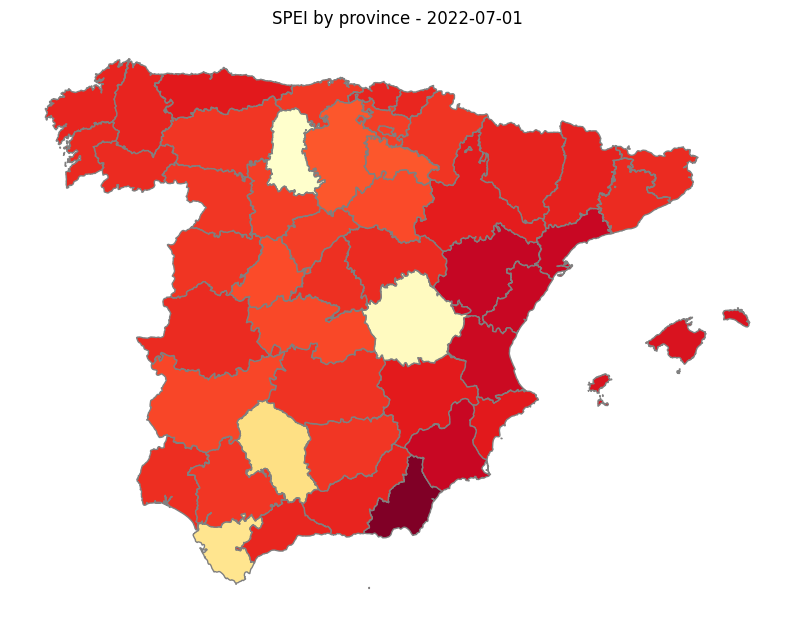

In [12]:
import matplotlib.pyplot as plt

(
    spain_map.loc[:, ["ADM2_NAME", "geometry"]]
    .merge(terra_climate_spei_filtered, left_on="ADM2_NAME", right_on="province_name")
    .drop(columns=["ADM2_NAME", "date", "mean"])
    .plot(column="spei", cmap="YlOrRd", legend=False, edgecolor="gray", figsize=(10, 10))
)

plt.axis("off")
plt.title("SPEI by province - 2022-07-01")
plt.show()

In [ ]:
# (
#     spain_map.loc[:, ["ADM2_NAME", "geometry"]]
#     .merge(spei_base_filtered, left_on="ADM2_NAME", right_on="province")
#     .drop(columns=["ADM2_NAME", "date"])
#     .explore(column="SPEI")
# )